In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pickle

In [3]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [5]:
# Retrieve dataset and read first 5 rows
macroNutrient_median =pd.read_csv(r"../Dataset/Dataset_for_EDA/macroNutrient_median.csv", encoding= 'unicode_escape')
macroNutrient_median

No.                                        Description       Category  \
0     15155                          ABALONE,MIXED SPECIES,RAW        ABALONE   
1     15156                           ABALONE,MXD SP,CKD,FRIED        ABALONE   
2      9427                                        ABIYUCH,RAW        ABIYUCH   
3      9002                                  ACEROLA JUICE,RAW  ACEROLA JUICE   
4      9001                   ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA   
...     ...                                                ...            ...   
8785   1119        YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ         YOGURT   
8786   1220  YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FO...         YOGURT   
8787   1295                             YOGURT,VANILLA,NON-FAT         YOGURT   
8788  16004                 YOKAN,PREP FROM ADZUKI BNS & SUGAR          YOKAN   
8789   3217                                           ZWIEBACK       ZWIEBACK   

      Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0               105             6.01       17.10            0.76   
1               189            11.05       19.63            6.78   
2                69            17.60        1.50            0.10   
3                23             4.80        0.40            0.30   
4                32             7.69        0.40            0.30   
...             ...              ...         ...             ...   
8785             85            13.80        4.93            1.25   
8786             85            13.80        4.93            1.25   
8787             78            17.04        2.94            0.00   
8788            260            60.72        3.29            0.12   
8789            426            74.20       10.10            9.70   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                             0.1070                           0.104   
1                             2.7410                           1.676   
2                             1.9385                           0.696   
3                             0.0820                           0.090   
4                             0.0820                           0.090   
...                              ...                             ...   
8785                          0.3430                           0.036   
8786                          0.3430                           0.036   
8787                          0.0000                           0.000   
8788                          0.0110                           0.026   
8789                          4.2440                           2.073   

      Saturated Fatty Acids(g)  
0                        0.149  
1                        1.646  
2                        0.014  
3                        0.068  
4                        0.068  
...                        ...  
8785                     0.806  
8786                     0.806  
8787                     0.000  
8788                     0.043  
8789                     2.525  

[8790 rows x 10 columns]

In [6]:
macroNutrient_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No.                             8790 non-null   int64  
 1   Description                     8790 non-null   object 
 2   Category                        8790 non-null   object 
 3   Energy (Kcal)                   8790 non-null   int64  
 4   Carbohydrate(g)                 8790 non-null   float64
 5   Protein(g)                      8790 non-null   float64
 6   Total Lipid(g)                  8790 non-null   float64
 7   Monounsaturated Fatty Acids(g)  8790 non-null   float64
 8   Polyunsaturated Fatty Acids(g)  8790 non-null   float64
 9   Saturated Fatty Acids(g)        8790 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 686.8+ KB


In [7]:
macroNutrient_median.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222     226.317634        22.127710    11.342849   
std     9251.413586     169.877539        27.270822    10.530474   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000      91.000000         0.050000     2.380000   
50%    14427.500000     191.000000         9.340000     8.000000   
75%    20142.750000     337.000000        34.910000    19.880000   
max    93600.000000     902.000000       100.000000    88.320000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean        10.553725                        3.918673   
std         15.814842                        6.763709   
min          0.000000                        0.000000   
25%          0.950000                        0.304000   
50%          5.140000                        1.938500   
75%         13.720000                        4.759000   
max        100.000000                       83.689000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         2.168267                  3.497547  
std                          5.032118                  6.399843  
min                          0.000000                  0.000000  
25%                          0.249000                  0.259000  
50%                          0.696000                  1.592000  
75%                          1.880000                  4.173750  
max                         74.623000                 95.600000

In [8]:
macroNutrient_median.head()

No.                       Description       Category  Energy (Kcal)  \
0  15155         ABALONE,MIXED SPECIES,RAW        ABALONE            105   
1  15156          ABALONE,MXD SP,CKD,FRIED        ABALONE            189   
2   9427                       ABIYUCH,RAW        ABIYUCH             69   
3   9002                 ACEROLA JUICE,RAW  ACEROLA JUICE             23   
4   9001  ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA             32   

   Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0             6.01       17.10            0.76   
1            11.05       19.63            6.78   
2            17.60        1.50            0.10   
3             4.80        0.40            0.30   
4             7.69        0.40            0.30   

   Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                          0.1070                           0.104   
1                          2.7410                           1.676   
2                          1.9385                           0.696   
3                          0.0820                           0.090   
4                          0.0820                           0.090   

   Saturated Fatty Acids(g)  
0                     0.149  
1                     1.646  
2                     0.014  
3                     0.068  
4                     0.068

In [9]:
float_columns = [x for x in macroNutrient_median.columns if x not in ['No.', 'Description', 'Category']]

In [10]:
skew_columns = (macroNutrient_median[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
print("{} of the 7 columns are skewed with the vast majority being heavily skewed".format(len(skew_columns)))
skew_columns

7 of the 7 columns are skewed with the vast majority being heavily skewed


Saturated Fatty Acids(g)          6.722778
Polyunsaturated Fatty Acids(g)    6.401464
Monounsaturated Fatty Acids(g)    4.764472
Total Lipid(g)                    3.309724
Protein(g)                        1.166368
Energy (Kcal)                     1.148610
Carbohydrate(g)                   1.127598
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    macroNutrient_median[col] = np.log1p(macroNutrient_median[col])

In [12]:
macroNutrient_median[float_columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          4.663439         1.947338    2.895912        0.565314   
1          5.247024         2.489065    3.026746        2.051556   
2          4.248495         2.923162    0.916291        0.095310   
3          3.178054         1.757858    0.336472        0.262364   
4          3.496508         2.162173    0.336472        0.262364   
...             ...              ...         ...             ...   
8785       4.454347         2.694627    1.780024        0.810930   
8786       4.454347         2.694627    1.780024        0.810930   
8787       4.369448         2.892592    1.371181        0.000000   
8788       5.564520         4.122608    1.456287        0.113329   
8789       6.056784         4.320151    2.406945        2.370244   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.101654                        0.098940   
1                           1.319353                        0.984323   
2                           1.077899                        0.528273   
3                           0.078811                        0.086178   
4                           0.078811                        0.086178   
...                              ...                             ...   
8785                        0.294906                        0.035367   
8786                        0.294906                        0.035367   
8787                        0.000000                        0.000000   
8788                        0.010940                        0.025668   
8789                        1.657085                        1.122654   

      Saturated Fatty Acids(g)  
0                     0.138892  
1                     0.973049  
2                     0.013903  
3                     0.065788  
4                     0.065788  
...                        ...  
8785                  0.591114  
8786                  0.591114  
8787                  0.000000  
8788                  0.042101  
8789                  1.259880  

[8790 rows x 7 columns]

In [13]:
macroNutrient_median.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       5.065342         2.137177     2.047259   
std     9251.413586       0.997539         1.615109     1.068937   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       4.521789         0.048790     1.217876   
50%    14427.500000       5.257495         2.336020     2.197225   
75%    20142.750000       5.823046         3.581016     3.038792   
max    93600.000000       6.805723         4.615121     4.492225   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         1.770891                        1.126758   
std          1.183944                        0.895498   
min          0.000000                        0.000000   
25%          0.667829                        0.265436   
50%          1.814823                        1.077899   
75%          2.689207                        1.750764   
max          4.615121                        4.438986   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.752763                  1.054167  
std                          0.733516                  0.871130  
min                          0.000000                  0.000000  
25%                          0.222343                  0.230318  
50%                          0.528273                  0.952430  
75%                          1.057790                  1.643598  
max                          4.325760                  4.570579

In [14]:
scaler = MinMaxScaler()
macroNutrient_median[float_columns] = scaler.fit_transform(macroNutrient_median[float_columns])

macroNutrient_median.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       0.744277         0.463082     0.455734   
std     9251.413586       0.146574         0.349960     0.237953   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       0.664410         0.010572     0.271107   
50%    14427.500000       0.772511         0.506167     0.489117   
75%    20142.750000       0.855610         0.775931     0.676456   
max    93600.000000       1.000000         1.000000     1.000000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         0.383715                        0.253832   
std          0.256536                        0.201735   
min          0.000000                        0.000000   
25%          0.144705                        0.059797   
50%          0.393234                        0.242826   
75%          0.582695                        0.394406   
max          1.000000                        1.000000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.174019                  0.230642  
std                          0.169569                  0.190595  
min                          0.000000                  0.000000  
25%                          0.051400                  0.050391  
50%                          0.122122                  0.208383  
75%                          0.244533                  0.359604  
max                          1.000000                  1.000000

In [15]:
X = macroNutrient_median[float_columns]
X

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## Dimensionality Reduction

In [16]:
from clustering_function import dimensionality_reduction,scatter_plot_clustering

In [17]:
# Reduced to 2 dimensions using tsne
X_tsne_reduced, tsne_x_data, tsne_y_data, reduction_method = dimensionality_reduction(X, 't-SNE', n_components=2)

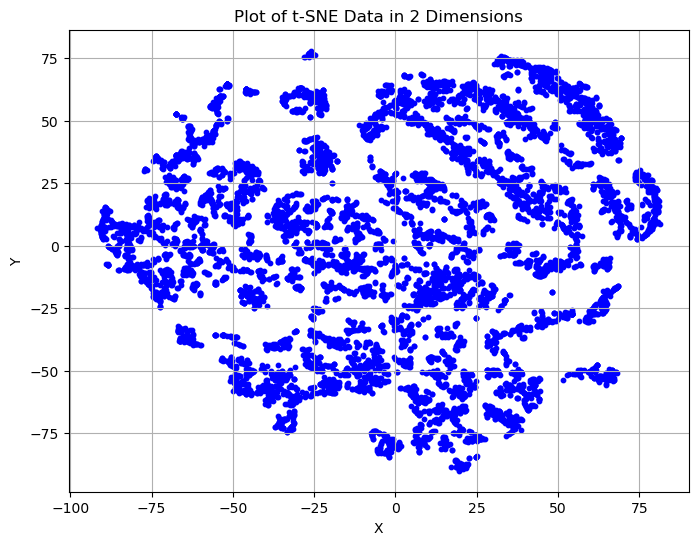

In [18]:
scatter_plot_clustering(tsne_x_data, tsne_y_data, reduction_method)

In [19]:
X_tsne_reduced

array([[ -2.8866012 ,  25.033136  ],
       [ 10.356084  ,   0.31811064],
       [-28.60716   ,  33.482193  ],
       ...,
       [-60.97991   ,  -6.97665   ],
       [-50.850197  , -45.544563  ],
       [  2.5995357 , -35.31806   ]], dtype=float32)

In [20]:
pd.DataFrame(X_tsne_reduced).to_csv("../Dataset/Dataset_for_reduced_data/median_reduced.csv")

In [21]:
# Reduced to 2 dimensions using pca
X_pca_reduced, pca_x_data, pca_y_data, reduction_method = dimensionality_reduction(X, 'PCA', n_components=2)

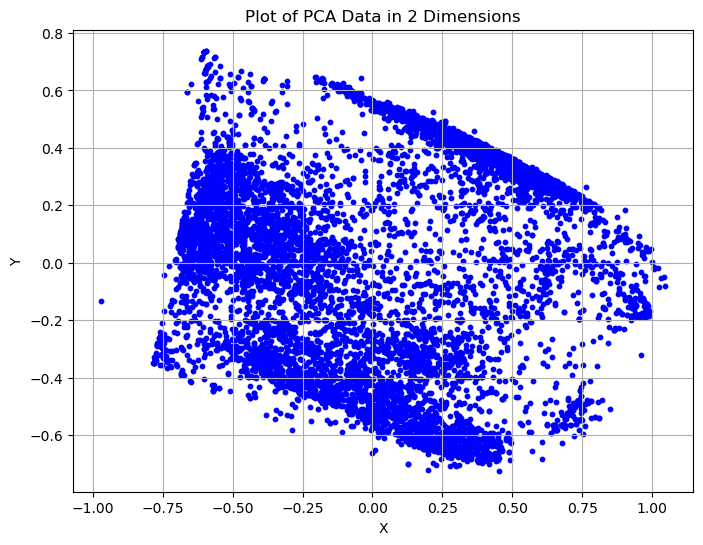

In [22]:
scatter_plot_clustering(pca_x_data, pca_y_data, reduction_method)

In [23]:
X_pca_reduced

array([[-0.28583447,  0.23920712],
       [ 0.11334472, -0.07742649],
       [-0.48422218, -0.01451935],
       ...,
       [-0.58623631,  0.0718748 ],
       [-0.62047369, -0.2098833 ],
       [ 0.04574319, -0.51445591]])

## K Means: Optimal number of clusters

#### Silhoutte Analysis

In [24]:
from clustering_function import plot_silhouette_analysis

For n_clusters = 2 The average silhouette_score is : 0.36614758
For n_clusters = 3 The average silhouette_score is : 0.43591416
For n_clusters = 4 The average silhouette_score is : 0.3885924
For n_clusters = 5 The average silhouette_score is : 0.36350286
For n_clusters = 6 The average silhouette_score is : 0.39561477
For n_clusters = 7 The average silhouette_score is : 0.39939517


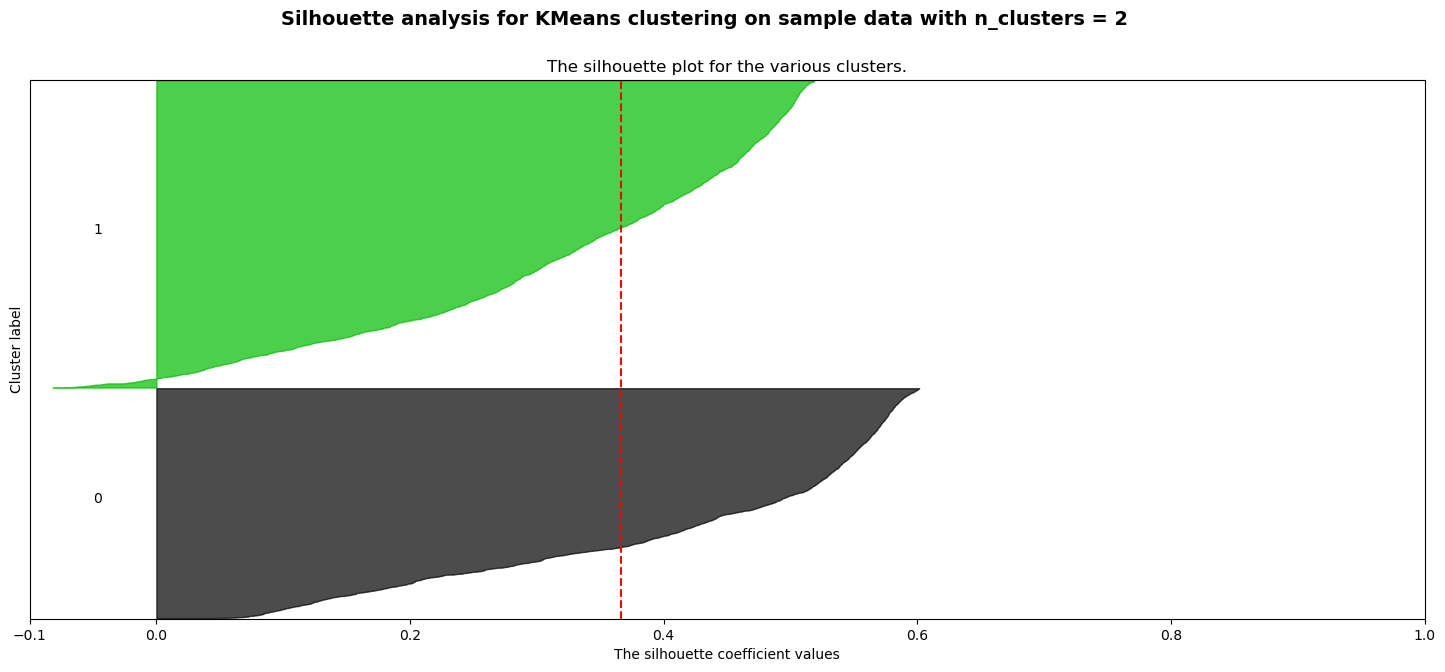

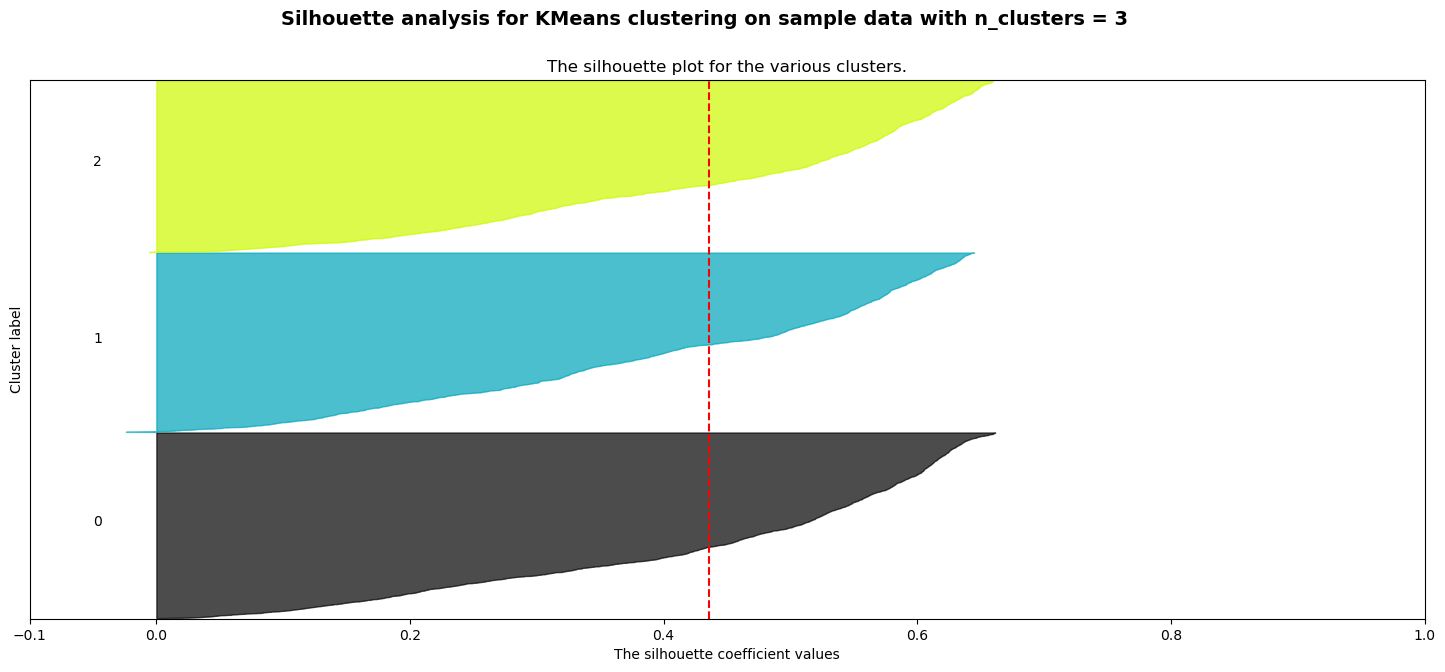

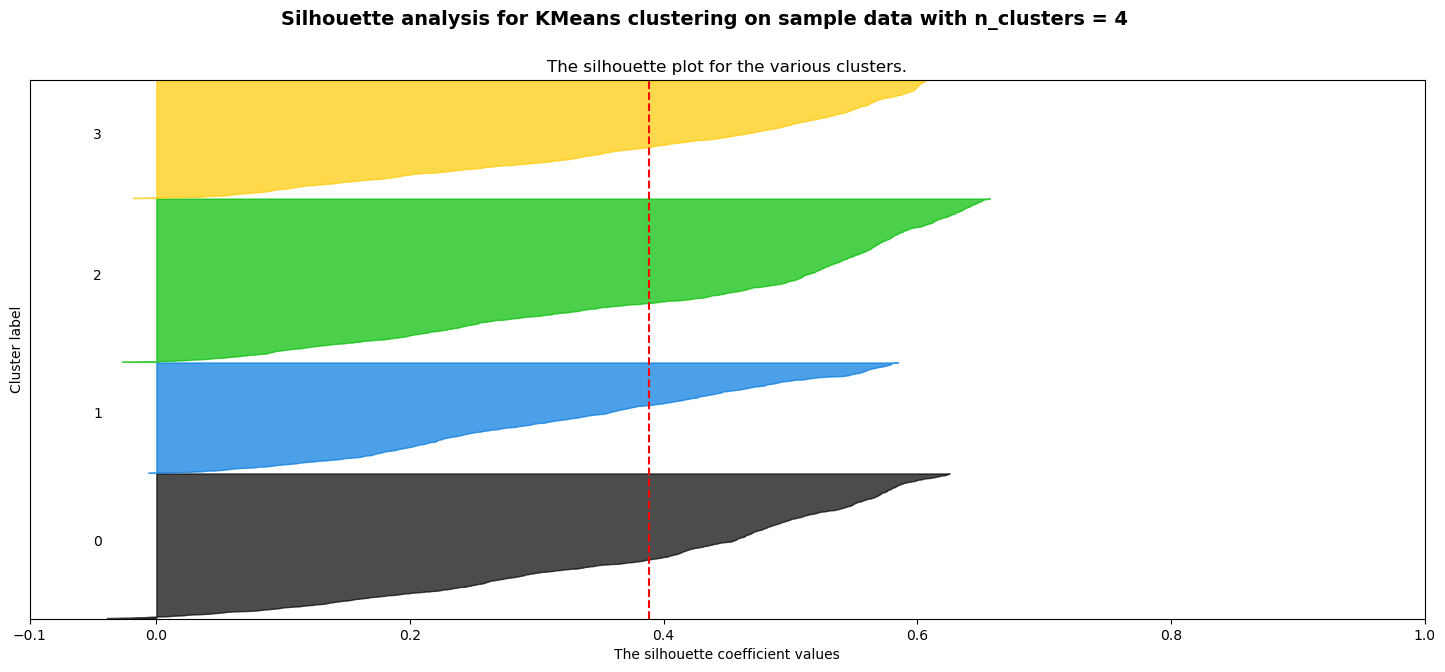

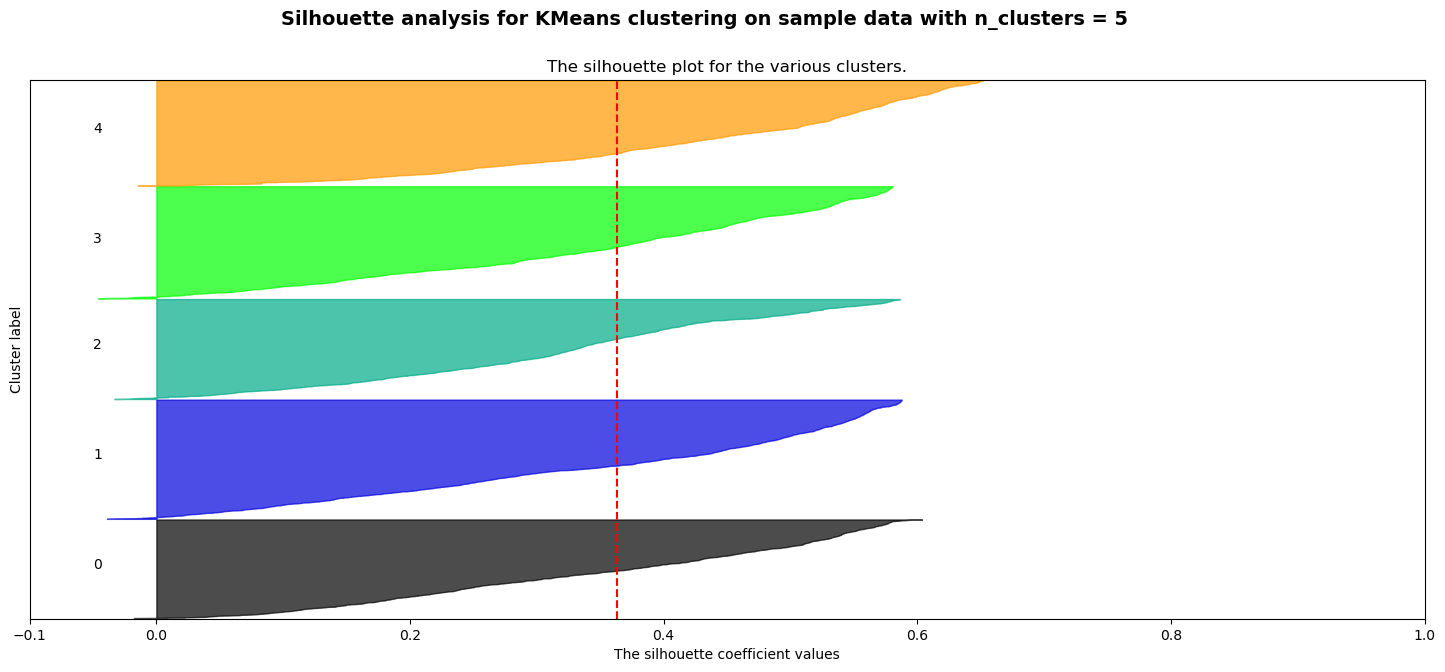

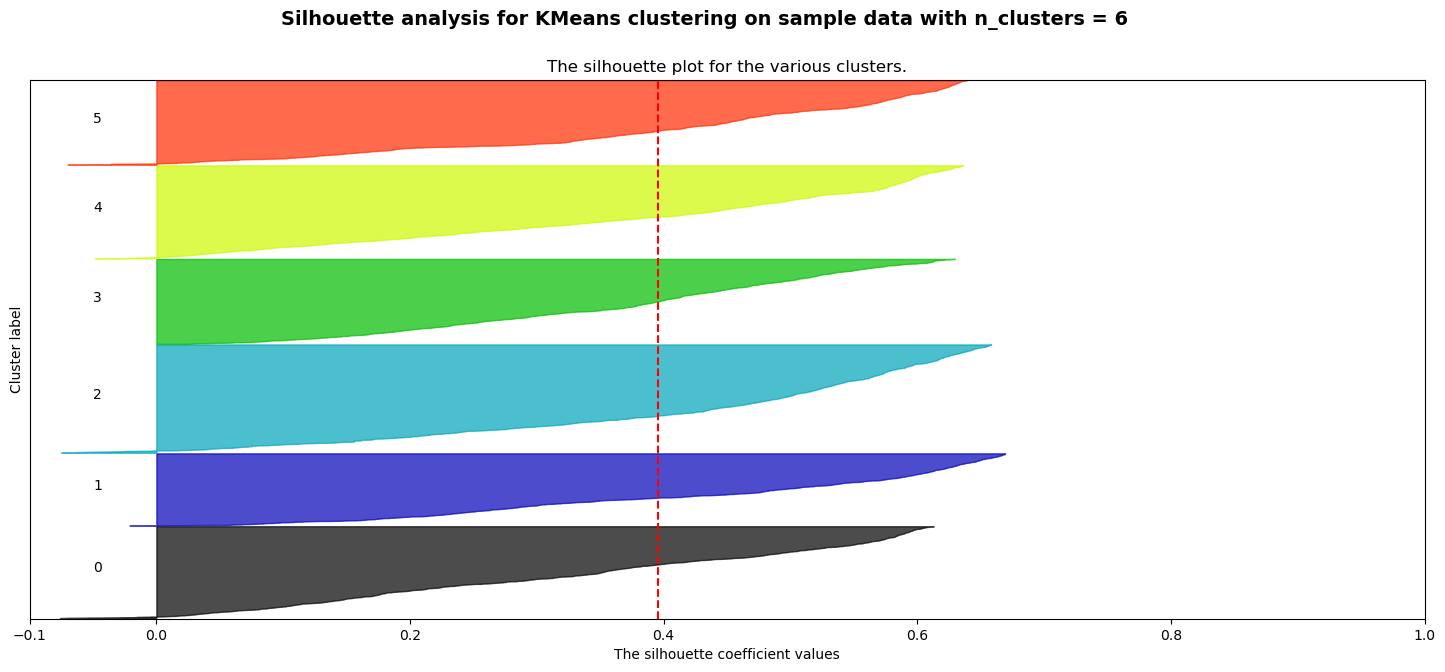

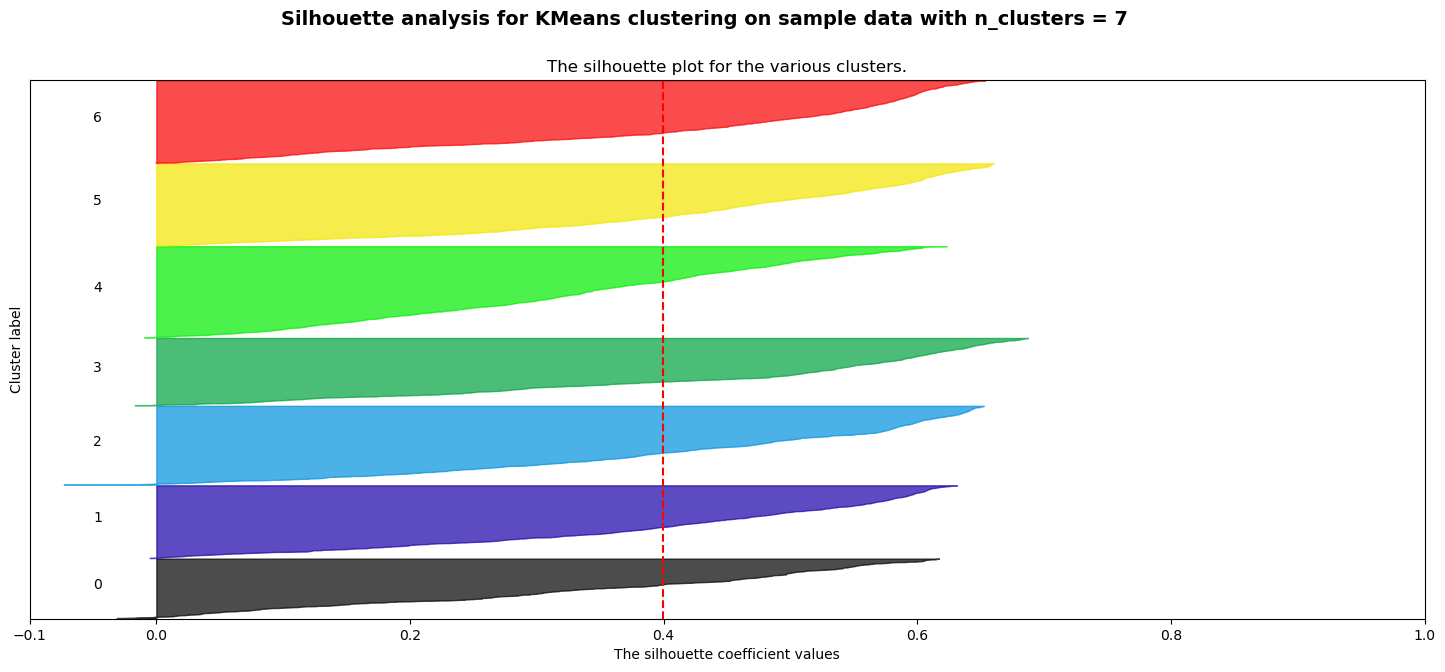

In [25]:
tsne_list_num_clusters = list(range(2,8))
plot_silhouette_analysis(X_tsne_reduced, tsne_list_num_clusters)

3 clusters seems to be the best number of cluster according to Silhouette Analysis.

#### Elbow Method

In [26]:
from clustering_function import elbow_method_analysis

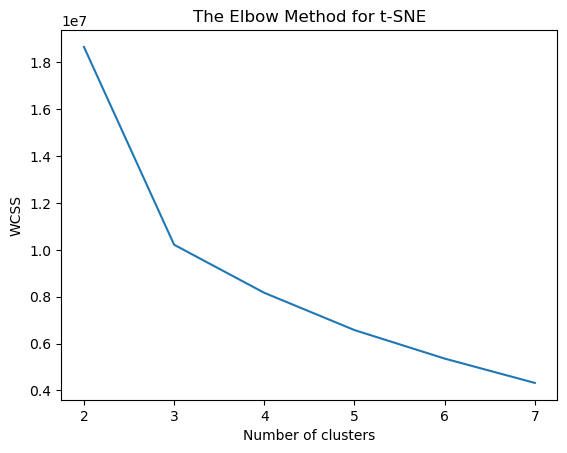

In [27]:
elbow_method_analysis(X_tsne_reduced)

Given that the elbow point falls at 3, the elbow method also suggests that 3 clusters will be the ideal number of clusters for K-Means.

## Clustering

In [28]:
# Trackers throughout each model
scores = {} # to track the silhoutte score of the tuned model
food_groups = {} # to track the counts of each group

In [29]:
X_with_labels = X.copy()
X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## K Means Clustering

In [30]:
from clustering_function import perform_kmeans_clustering, plot_clusters

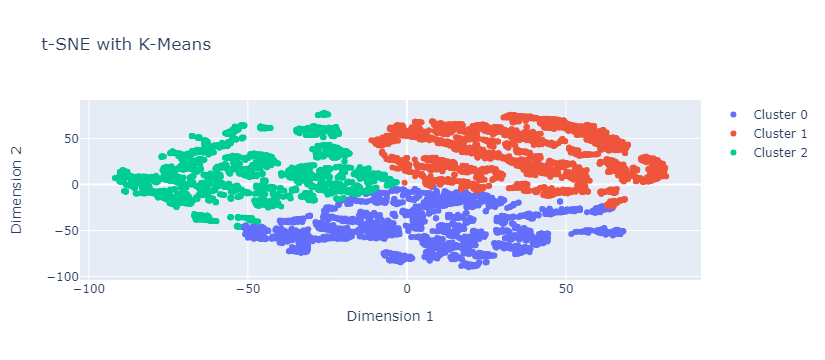

In [31]:
tsne_clust_labels, kmean_model = perform_kmeans_clustering(X_tsne_reduced, 3)
plot_clusters(X_tsne_reduced, tsne_clust_labels, 'K-Means')

In [32]:
# export model
with open('../Model_fitted/Kmeans_model_median_pkl', 'wb') as files:
    pickle.dump(kmean_model, files)

In [33]:
X_with_labels['kmeans_tsne'] = tsne_clust_labels
scores['kmeans_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['kmeans_tsne']))

X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            1  
1                     0.212894            1  
2                     0.003042            2  
3                     0.014394            2  
4                     0.014394            2  
...                        ...          ...  
8785                  0.129330            2  
8786                  0.129330            2  
8787                  0.000000            2  
8788                  0.009211            0  
8789                  0.275650            0  

[8790 rows x 8 columns]

In [34]:
from clustering_function import get_food_groups, plot_cluster_distribution

In [35]:
food_groups, value_counts = get_food_groups(X_with_labels['kmeans_tsne'], 'KMeans_tsne',food_groups)

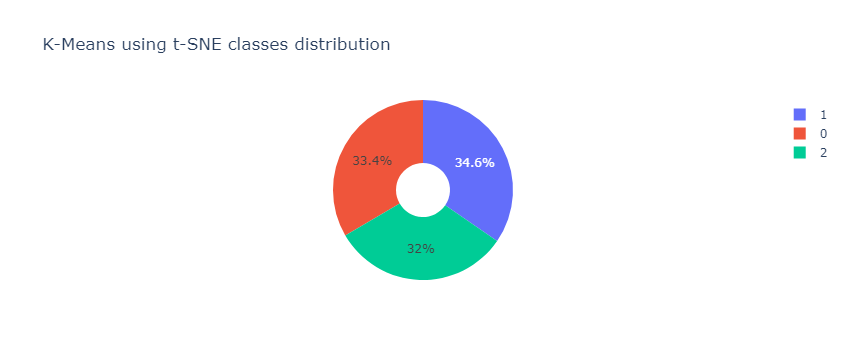

In [36]:
plot_cluster_distribution(value_counts, 'K-Means')

In [37]:
kmeans_tsne = X_with_labels.groupby('kmeans_tsne')

In [38]:
n = kmeans_tsne['kmeans_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(kmeans_tsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
13         0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
13                          0.615989                        0.517992   
...                              ...                             ...   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
5                     0.348734            0  
7                     0.355775            0  
8                     0.308817            0  
12                    0.494853            0  
13                    0.473315            0  
...                        ...          ...  
8725                  0.360711            0  
8745                  0.063870            0  
8748                  0.000000            0  
8788                  0.009211            0  
8789                  0.275650            0  

[2937 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8772       0.601603         0.330664    0.537600        0.071353   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8749                        0.242826                        0.122122   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8772                        0.011634                        0.002758   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            1  
1                     0.212894            1  
14                    0.395637            1  
100                   0.254692            1  
101                   0.180514            1  
...                        ...          ...  
8749                  0.208383            1  
8750                  0.180322            1  
8771                  0.175470            1  
8772                  0.024208            1  
8773                  0.267429            1  

[3041 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.242826                        0.122122   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  
2                     0.003042            2  
3                     0.014394            2  
4                     0.014394            2  
6                     0.180322            2  
9                     0.208383            2  
...                        ...          ...  
8783                  0.024012            2  
8784                  0.122689            2  
8785                  0.129330            2  
8786                  0.129330            2  
8787                  0.000000            2  

[2812 rows x 8 columns]

### Insights

In [39]:
kmeans_tsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2937.000000      2937.000000  2937.000000     2937.000000   
mean        0.863727         0.805301     0.460011        0.526370   
std         0.053829         0.193784     0.165270        0.210419   
min         0.656199         0.000000     0.000000        0.000000   
25%         0.829515         0.733767     0.383500        0.377123   
50%         0.869298         0.876045     0.478997        0.544657   
75%         0.901848         0.929653     0.560456        0.674634   
max         1.000000         0.986273     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2937.000000                     2937.000000   
mean                         0.329947                        0.299584   
std                          0.199535                        0.199596   
min                          0.000000                        0.000000   
25%                          0.192959                        0.138181   
50%                          0.317862                        0.255735   
75%                          0.448099                        0.421787   
max                          0.984335                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2937.000000       2937.0  
mean                   0.302195          0.0  
std                    0.180595          0.0  
min                    0.000000          0.0  
25%                    0.142837          0.0  
50%                    0.307050          0.0  
75%                    0.430294          0.0  
max                    0.903884          0.0

Cluster 0: It appears that this cluster contains foods heavy in lipids and energy. The energy value minimum of 0.656 is the greatest minimum value observed across all clusters.

In [40]:
kmeans_tsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3041.000000      3041.000000  3041.000000     3041.000000   
mean        0.773320         0.078428     0.679336        0.500426   
std         0.068658         0.149217     0.116332        0.179250   
min         0.509238         0.000000     0.000000        0.000000   
25%         0.729216         0.000000     0.660090        0.380891   
50%         0.770972         0.000000     0.698659        0.496306   
75%         0.810708         0.079011     0.739935        0.618189   
max         1.000000         0.751628     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3041.000000                     3041.000000   
mean                         0.344084                        0.163226   
std                          0.166106                        0.114097   
min                          0.000000                        0.000000   
25%                          0.233872                        0.079265   
50%                          0.335200                        0.124698   
75%                          0.454211                        0.220889   
max                          1.000000                        0.649514   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               3041.000000       3041.0  
mean                   0.316879          1.0  
std                    0.169445          0.0  
min                    0.000000          1.0  
25%                    0.200476          1.0  
50%                    0.294946          1.0  
75%                    0.419823          1.0  
max                    1.000000          1.0

Cluster 1: This cluster predominantly consists of low-carb foods, with approximately half of the data falling into this category. The statistical analysis reveals that this cluster exhibits the highest Q1 range for protein, reaching 0.66. Consequently, it can be inferred that Cluster 1 is primarily composed of protein-rich foods.

In [41]:
kmeans_tsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2812.000000      2812.000000  2812.000000     2812.000000   
mean        0.588109         0.521628     0.209455        0.108504   
std         0.137224         0.183761     0.138160        0.114048   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.416072     0.097559        0.020652   
50%         0.604032         0.527693     0.209686        0.063415   
75%         0.669125         0.633970     0.306923        0.168863   
max         0.881455         1.000000     0.715473        0.606244   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2812.000000                     2812.000000   
mean                         0.076733                        0.054543   
std                          0.097881                        0.057750   
min                          0.000000                        0.000000   
25%                          0.002687                        0.009289   
50%                          0.014187                        0.030898   
75%                          0.143674                        0.112947   
max                          0.565610                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2812.000000       2812.0  
mean                   0.062648          2.0  
std                    0.082691          0.0  
min                    0.000000          2.0  
25%                    0.003903          2.0  
50%                    0.016230          2.0  
75%                    0.104264          2.0  
max                    0.373856          2.0

 Cluster 2: The maximum values for the fatty acids in this cluster were the lowest among all the cluster. Hence can conclude that this cluster is food that low in fatty acids. This suggests that this cluster may consists of healthy food.

## Agglomerative Clustering

In [42]:
from clustering_function import tuning_agglomerative, perform_agg_clustering

In [43]:
agg_param_grid = {
      'n_clusters': [2, 3, 4, 5, 6],
      'linkage': ['ward'],
      'affinity' : ['euclidean']
  }

In [44]:
tuning_agglomerative(X_tsne_reduced, agg_param_grid)

Best silhouette score: 0.38080552
Best parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}


In [45]:
Agg_tsne_clust_labels,agg_model = perform_agg_clustering(X_tsne_reduced, 3)

In [46]:
# export model
with open('../Model_fitted/Agg_model_median_pkl', 'wb') as files:
    pickle.dump(agg_model, files)

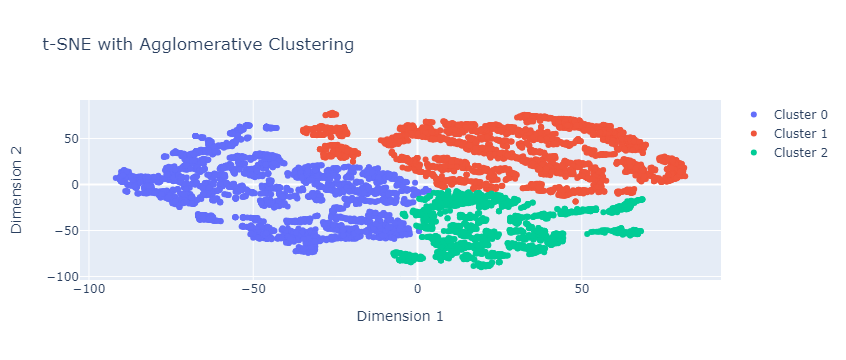

In [47]:
plot_clusters(X_tsne_reduced, Agg_tsne_clust_labels, "Agglomerative Clustering")

In [48]:
X_with_labels['Agg_tsne'] = Agg_tsne_clust_labels
scores['Agg_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Agg_tsne']))

In [49]:
food_groups, value_counts = get_food_groups(X_with_labels['Agg_tsne'], 'Agglomerative_tsne',food_groups)

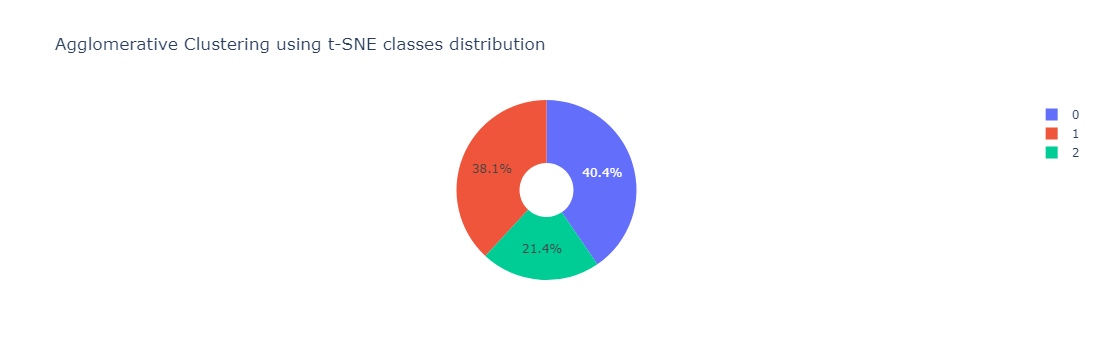

In [50]:
plot_cluster_distribution(value_counts, 'Agglomerative Clustering')

In [51]:
Aggtsne = X_with_labels.groupby('Agg_tsne')

In [52]:
n = Aggtsne['Agg_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Aggtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
10         0.857339         0.957418    0.221928        0.113698   
15         0.836114         0.000000    0.000000        0.000000   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
10                          0.242826                        0.122122   
15                          0.000000                        0.000000   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
3                     0.014394            2         0  
4                     0.014394            2         0  
6                     0.180322            2         0  
10                    0.208383            2         0  
15                    0.000000            2         0  
...                        ...          ...       ...  
8784                  0.122689            2         0  
8785                  0.129330            2         0  
8786                  0.129330            2         0  
8787                  0.000000            2         0  
8788                  0.009211            0         0  

[3555 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
9          0.721842         0.757620    0.153183        0.055176   
11         0.622139         0.616810    0.093208        0.030283   
...             ...              ...         ...             ...   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8772       0.601603         0.330664    0.537600        0.071353   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.242826                        0.122122   
9                           0.242826                        0.122122   
11                          0.242826                        0.122122   
...                              ...                             ...   
8749                        0.242826                        0.122122   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8772                        0.011634                        0.002758   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
0                     0.030388            1         1  
1                     0.212894            1         1  
2                     0.003042            2         1  
9                     0.208383            2         1  
11                    0.208383            2         1  
...                        ...          ...       ...  
8749                  0.208383            1         1  
8750                  0.180322            1         1  
8771                  0.175470            1         1  
8772                  0.024208            1         1  
8773                  0.267429            1         1  

[3350 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
13         0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8629       0.807727         0.732959    0.581346        0.493436   
8659       0.882545         0.914725    0.526799        0.531641   
8696       0.883985         0.813507    0.761901        0.617939   
8725       0.859472         0.591069    0.577721        0.718901   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
13                          0.615989                        0.517992   
...                              ...                             ...   
8629                        0.340380                        0.173271   
8659                        0.385713                        0.213847   
8696                        0.438754                        0.386834   
8725                        0.444714                        0.657667   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
5                     0.348734            0         2  
7                     0.355775            0         2  
8                     0.308817            0         2  
12                    0.494853            0         2  
13                    0.473315            0         2  
...                        ...          ...       ...  
8629                  0.327419            0         2  
8659                  0.356463            0         2  
8696                  0.261418            0         2  
8725                  0.360711            0         2  
8789                  0.275650            0         2  

[1885 rows x 9 columns]

### Insights

In [53]:
Aggtsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3555.000000      3555.000000  3555.000000     3555.000000   
mean        0.666548         0.633652     0.295738        0.174720   
std         0.167766         0.234432     0.188526        0.153656   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.568816         0.466745     0.142881        0.039505   
50%         0.669125         0.620550     0.286992        0.134466   
75%         0.823148         0.857315     0.447489        0.304672   
max         0.947569         1.000000     0.964519        0.924243   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3555.000000                     3555.000000   
mean                         0.082623                        0.076877   
std                          0.097304                        0.080969   
min                          0.000000                        0.000000   
25%                          0.003798                        0.011719   
50%                          0.035946                        0.043492   
75%                          0.145836                        0.122122   
max                          0.565610                        0.487236   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               3555.000000  3555.000000    3555.0  
mean                   0.079875     1.381997       0.0  
std                    0.100300     0.924141       0.0  
min                    0.000000     0.000000       0.0  
25%                    0.006255     0.000000       0.0  
50%                    0.034351     2.000000       0.0  
75%                    0.129330     2.000000       0.0  
max                    0.756575     2.000000       0.0

Cluster 0: Among all the food clusters, this one has the lowest fat content, with lipids and three fatty acids each around value of 0.3 (excluding maximum value). This implies that there may be healthy foods in this food cluster.

In [54]:
Aggtsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3350.000000      3350.000000  3350.000000     3350.000000   
mean        0.749137         0.123298     0.635710        0.448678   
std         0.087602         0.193661     0.179329        0.205318   
min         0.376881         0.000000     0.000000        0.000000   
25%         0.709449         0.000000     0.635389        0.331135   
50%         0.759726         0.000000     0.692396        0.467998   
75%         0.802205         0.225788     0.736299        0.594092   
max         0.999674         0.795036     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3350.000000                     3350.000000   
mean                         0.328621                        0.156111   
std                          0.152704                        0.103982   
min                          0.000000                        0.000000   
25%                          0.242826                        0.084296   
50%                          0.304128                        0.122122   
75%                          0.436242                        0.204303   
max                          0.923391                        0.629091   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               3350.000000  3350.000000    3350.0  
mean                   0.288747     1.104478       1.0  
std                    0.158963     0.311726       0.0  
min                    0.000000     0.000000       1.0  
25%                    0.187612     1.000000       1.0  
50%                    0.267911     1.000000       1.0  
75%                    0.390189     1.000000       1.0  
max                    0.786175     2.000000       1.0

Cluster 1: This cluster seems to be a low-carb meal cluster, as Q1 and  Q2 have carbohydrate values of 0. The greatest value of carbohydrates was about 0.75g (after log tansform and min max scaled), which is the lowest among all clusters.

In [55]:
Aggtsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1885.000000      1885.000000  1885.000000     1885.000000   
mean        0.882231         0.745255     0.437626        0.662416   
std         0.054809         0.247276     0.183585        0.141062   
min         0.712934         0.000000     0.000000        0.348732   
25%         0.840996         0.681925     0.367857        0.554266   
50%         0.891665         0.842390     0.462898        0.641729   
75%         0.914315         0.908793     0.566303        0.729697   
max         1.000000         0.979258     0.898049        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1885.000000                     1885.000000   
mean                         0.443810                        0.389048   
std                          0.170806                        0.194710   
min                          0.000000                        0.000000   
25%                          0.328592                        0.246133   
50%                          0.418181                        0.367389   
75%                          0.528850                        0.506677   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               1885.000000  1885.000000    1885.0  
mean                   0.411717     0.027586       2.0  
std                    0.154498     0.163827       0.0  
min                    0.000000     0.000000       2.0  
25%                    0.307695     0.000000       2.0  
50%                    0.391984     0.000000       2.0  
75%                    0.497368     0.000000       2.0  
max                    1.000000     1.000000       2.0

Cluster 2: This cluster may consist of foods high in energy because the first quartile of data was around 0.84, the highest of all the clusters. Based on the three fatty acid compositions, this cluster indicates that the meal in this cluster is maximal in fat. The fact that this food cluster has the highest value of total lipids among all clusters serves as additional support.

## GMM

In [56]:
from clustering_function import gmm_bic_score, perform_gmm_clustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [57]:
gmm_param_grid = {
    "n_components": range(1, 6),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=gmm_param_grid, scoring=gmm_bic_score
)

In [58]:
grid_search.fit(X_tsne_reduced)
Gmm_tsne_results = grid_search.cv_results_

In [59]:
Gmm_tsne_df = pd.DataFrame(Gmm_tsne_results)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
Gmm_tsne_df["mean_test_score"] = -Gmm_tsne_df["mean_test_score"]
Gmm_tsne_df = Gmm_tsne_df.rename(
    columns={
        "param_n_components": "Number of Components",
        "param_covariance_type": "Type of Covariance",
        "mean_test_score": "BIC Score",
    }
)
Gmm_tsne_df.sort_values(by="BIC Score").head()

Number of Components Type of Covariance     BIC Score
7                     3               tied  36259.642277
2                     3          spherical  36277.982784
12                    3               diag  36285.380930
9                     5               tied  36307.227321
17                    3               full  36333.090942

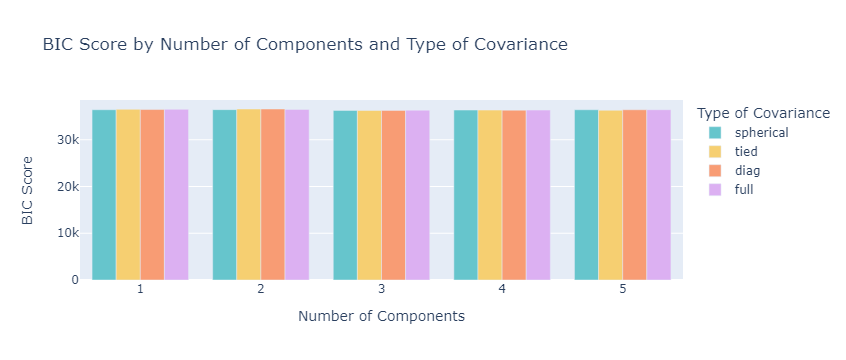

In [60]:
fig = px.bar(Gmm_tsne_df, x="Number of Components", y="BIC Score",
                 color="Type of Covariance", barmode="group",
                 title="BIC Score by Number of Components and Type of Covariance",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [61]:
Gmm_tsne_labels,gmm_model = perform_gmm_clustering(X_tsne_reduced, 3, 'tied')

In [62]:
# export model
with open('../Model_fitted/Gmm_model_median_pkl', 'wb') as files:
    pickle.dump(gmm_model, files)

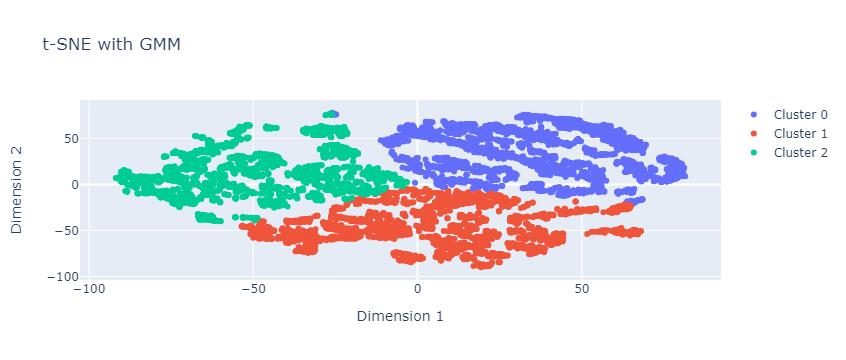

In [63]:
plot_clusters(X_tsne_reduced, Gmm_tsne_labels, "GMM")

In [64]:
X_with_labels['Gmm_tsne'] = Gmm_tsne_labels
scores['Gmm_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Gmm_tsne']))

In [65]:
food_groups, value_counts = get_food_groups(X_with_labels['Gmm_tsne'], 'GMM_tsne',food_groups)

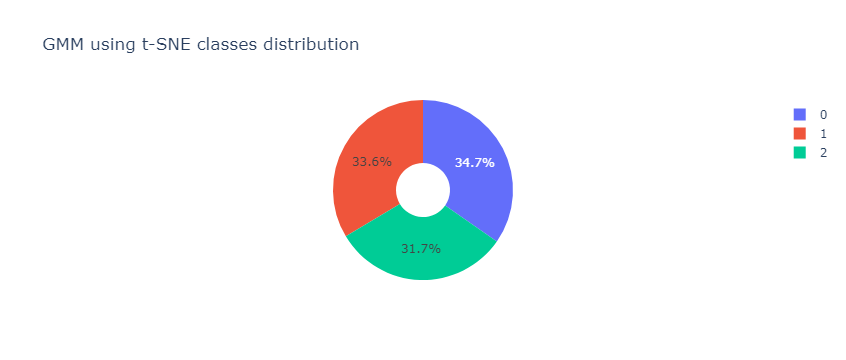

In [66]:
plot_cluster_distribution(value_counts, 'GMM')

In [67]:
GmmTsne = X_with_labels.groupby('Gmm_tsne')

In [68]:
n = GmmTsne['Gmm_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(GmmTsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
52         0.654500         0.288696    0.015061        0.000000   
53         0.656199         0.334863    0.015061        0.000000   
...             ...              ...         ...             ...   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8772       0.601603         0.330664    0.537600        0.071353   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
52                          0.242826                        0.122122   
53                          0.242826                        0.122122   
...                              ...                             ...   
8749                        0.242826                        0.122122   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8772                        0.011634                        0.002758   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
0                     0.030388            1         1         0  
1                     0.212894            1         1         0  
14                    0.395637            1         1         0  
52                    0.208383            2         1         0  
53                    0.208383            2         1         0  
...                        ...          ...       ...       ...  
8749                  0.208383            1         1         0  
8750                  0.180322            1         1         0  
8771                  0.175470            1         1         0  
8772                  0.024208            1         1         0  
8773                  0.267429            1         1         0  

[3048 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
13         0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
13                          0.615989                        0.517992   
...                              ...                             ...   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
5                     0.348734            0         2         1  
7                     0.355775            0         2         1  
8                     0.308817            0         2         1  
12                    0.494853            0         2         1  
13                    0.473315            0         2         1  
...                        ...          ...       ...       ...  
8725                  0.360711            0         2         1  
8745                  0.063870            0         0         1  
8748                  0.000000            0         0         1  
8788                  0.009211            0         0         1  
8789                  0.275650            0         2         1  

[2954 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.242826                        0.122122   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
2                     0.003042            2         1         2  
3                     0.014394            2         0         2  
4                     0.014394            2         0         2  
6                     0.180322            2         0         2  
9                     0.208383            2         1         2  
...                        ...          ...       ...       ...  
8783                  0.024012            2         0         2  
8784                  0.122689            2         0         2  
8785                  0.129330            2         0         2  
8786                  0.129330            2         0         2  
8787                  0.000000            2         0         2  

[2788 rows x 10 columns]

### Insights

In [69]:
GmmTsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3048.000000      3048.000000  3048.000000     3048.000000   
mean        0.771972         0.080391     0.678424        0.496158   
std         0.067737         0.150926     0.118400        0.179918   
min         0.509238         0.000000     0.000000        0.000000   
25%         0.728185         0.000000     0.659228        0.378260   
50%         0.770197         0.000000     0.698562        0.494544   
75%         0.810117         0.088216     0.739855        0.615169   
max         1.000000         0.751628     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3048.000000                     3048.000000   
mean                         0.341405                        0.161836   
std                          0.162391                        0.111637   
min                          0.000000                        0.000000   
25%                          0.234012                        0.079388   
50%                          0.332745                        0.124023   
75%                          0.452313                        0.219573   
max                          0.971727                        0.629091   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               3048.000000  3048.000000  3048.000000    3048.0  
mean                   0.314871     1.003937     1.013123       0.0  
std                    0.167912     0.076759     0.116669       0.0  
min                    0.000000     0.000000     0.000000       0.0  
25%                    0.200410     1.000000     1.000000       0.0  
50%                    0.292086     1.000000     1.000000       0.0  
75%                    0.416816     1.000000     1.000000       0.0  
max                    1.000000     2.000000     2.000000       0.0

Cluster 0: With a maximum value of 1 and the highest reported protein Q1 of 0.659, this cluster appears to have categorized foods based on protein.

In [70]:
GmmTsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2954.000000      2954.000000  2954.000000     2954.000000   
mean        0.864490         0.803388     0.457639        0.526275   
std         0.053960         0.199434     0.167634        0.214055   
min         0.656199         0.000000     0.000000        0.000000   
25%         0.830033         0.733840     0.382104        0.376456   
50%         0.869694         0.876045     0.478997        0.545270   
75%         0.902165         0.929949     0.560277        0.675738   
max         1.000000         0.986273     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2954.000000                     2954.000000   
mean                         0.331457                        0.299671   
std                          0.202784                        0.200190   
min                          0.000000                        0.000000   
25%                          0.192767                        0.137161   
50%                          0.318110                        0.255697   
75%                          0.450811                        0.422187   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2954.000000  2954.000000  2954.000000    2954.0  
mean                   0.302524     0.012525     1.249492       1.0  
std                    0.182657     0.145524     0.968016       0.0  
min                    0.000000     0.000000     0.000000       1.0  
25%                    0.140432     0.000000     0.000000       1.0  
50%                    0.307614     0.000000     2.000000       1.0  
75%                    0.431911     0.000000     2.000000       1.0  
max                    0.903884     2.000000     2.000000       1.0

Cluster 1: This is a high-energy cluster with the first quartile of the data lying at 0.83 (the highest among all clusters).

In [71]:
GmmTsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2788.000000      2788.000000  2788.000000     2788.000000   
mean        0.586628         0.520892     0.210258        0.109738   
std         0.136497         0.181437     0.137622        0.114633   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.522406         0.418991     0.101826        0.020652   
50%         0.601603         0.529017     0.211846        0.065026   
75%         0.669125         0.633388     0.307622        0.170102   
max         0.881090         1.000000     0.715473        0.606244   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2788.000000                     2788.000000   
mean                         0.075846                        0.054205   
std                          0.097338                        0.057715   
min                          0.000000                        0.000000   
25%                          0.002465                        0.009067   
50%                          0.013975                        0.030392   
75%                          0.139711                        0.108327   
max                          0.565610                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               2788.000000  2788.000000  2788.000000    2788.0  
mean                   0.062396     1.997131     0.122310       2.0  
std                    0.082646     0.075715     0.327702       0.0  
min                    0.000000     0.000000     0.000000       2.0  
25%                    0.003903     2.000000     0.000000       2.0  
50%                    0.016230     2.000000     0.000000       2.0  
75%                    0.103413     2.000000     0.000000       2.0  
max                    0.373856     2.000000     1.000000       2.0

Cluster 2: Foods that fall under this category are thought to be lower in fat, or more healthful overall. This is due to the fact that 75% of the nutritional data for fats are less than 0.20 (0.17, 0.13, 0.11, 0.10 for lipid and 3 fatty acids, respectively).

## K-Medoids

In [72]:
from clustering_function import tuning_kmedoids, perform_kmd_clustering

In [73]:
kmd_param_grid = {
    'n_clusters': [3, 4],
    'method': ['alternate', 'pam'],
    'init' : ['random', 'heuristic', 'k-medoids++', 'build']
}

In [74]:
tuning_kmedoids(X_tsne_reduced, kmd_param_grid)

Best silhouette score: 0.4359154
Best parameters: {'init': 'random', 'method': 'alternate', 'n_clusters': 3}


In [75]:
Kmd_tsne_labels,kmd_model = perform_kmd_clustering(X_tsne_reduced, 3, 'random', 'alternate')

In [76]:
# export model
with open('../Model_fitted/Kmd_model_median_pkl', 'wb') as files:
    pickle.dump(kmd_model, files)

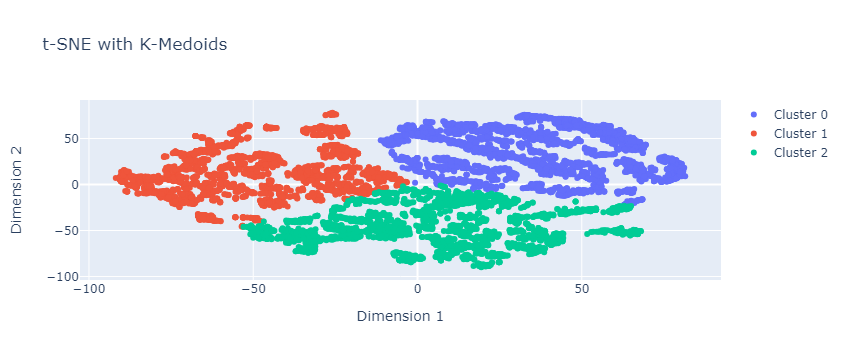

In [77]:
plot_clusters(X_tsne_reduced, Kmd_tsne_labels, "K-Medoids")

In [78]:
X_with_labels['Kmd_tsne'] = Kmd_tsne_labels
scores['Kmd_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Kmd_tsne']))

In [79]:
food_groups, value_counts = get_food_groups(X_with_labels['Kmd_tsne'], 'KMedoids_tsne',food_groups)

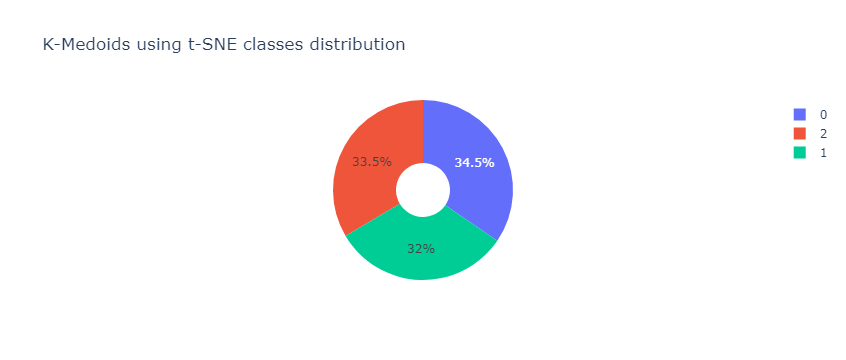

In [80]:
plot_cluster_distribution(value_counts, 'K-Medoids')

In [81]:
Kmdtsne = X_with_labels.groupby('Kmd_tsne')

In [82]:
n = Kmdtsne['Kmd_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Kmdtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8772       0.601603         0.330664    0.537600        0.071353   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8749                        0.242826                        0.122122   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8772                        0.011634                        0.002758   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
0                     0.030388            1         1         0         0  
1                     0.212894            1         1         0         0  
14                    0.395637            1         1         0         0  
100                   0.254692            1         1         0         0  
101                   0.180514            1         1         0         0  
...                        ...          ...       ...       ...       ...  
8749                  0.208383            1         1         0         0  
8750                  0.180322            1         1         0         0  
8771                  0.175470            1         1         0         0  
8772                  0.024208            1         1         0         0  
8773                  0.267429            1         1         0         0  

[3035 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.242826                        0.122122   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.242826                        0.122122   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
2                     0.003042            2         1         2         1  
3                     0.014394            2         0         2         1  
4                     0.014394            2         0         2         1  
6                     0.180322            2         0         2         1  
9                     0.208383            2         1         2         1  
...                        ...          ...       ...       ...       ...  
8783                  0.024012            2         0         2         1  
8784                  0.122689            2         0         2         1  
8785                  0.129330            2         0         2         1  
8786                  0.129330            2         0         2         1  
8787                  0.000000            2         0         2         1  

[2809 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
13         0.862406         0.577933    0.329815        0.756303   
...             ...              ...         ...             ...   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
13                          0.615989                        0.517992   
...                              ...                             ...   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
5                     0.348734            0         2         1         2  
7                     0.355775            0         2         1         2  
8                     0.308817            0         2         1         2  
12                    0.494853            0         2         1         2  
13                    0.473315            0         2         1         2  
...                        ...          ...       ...       ...       ...  
8725                  0.360711            0         2         1         2  
8745                  0.063870            0         0         1         2  
8748                  0.000000            0         0         1         2  
8788                  0.009211            0         0         1         2  
8789                  0.275650            0         2         1         2  

[2946 rows x 11 columns]

### Insights

In [83]:
Kmdtsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3035.000000      3035.000000  3035.000000     3035.000000   
mean        0.773084         0.077875     0.680102        0.499991   
std         0.068356         0.147989     0.114427        0.178727   
min         0.509238         0.000000     0.000000        0.000000   
25%         0.729216         0.000000     0.660434        0.380891   
50%         0.770972         0.000000     0.698948        0.496306   
75%         0.810708         0.079011     0.739975        0.617939   
max         1.000000         0.693086     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3035.000000                     3035.000000   
mean                         0.343654                        0.162658   
std                          0.165132                        0.113367   
min                          0.000000                        0.000000   
25%                          0.233992                        0.079183   
50%                          0.335200                        0.124428   
75%                          0.453866                        0.220577   
max                          0.971727                        0.629151   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               3035.000000       3035.0  3035.000000  3035.000000   
mean                   0.316777          1.0     1.015815     0.002636   
std                    0.169271          0.0     0.127396     0.051282   
min                    0.000000          1.0     0.000000     0.000000   
25%                    0.200476          1.0     1.000000     0.000000   
50%                    0.294946          1.0     1.000000     0.000000   
75%                    0.419582          1.0     1.000000     0.000000   
max                    1.000000          1.0     2.000000     1.000000   

       Kmd_tsne  
count    3035.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

Cluster 0: This food group is low in carbs and high in protein, as seen by the values of the two nutrients, which are 0.66 and 0.74 for protein and 0 to 0.08 for carbohydrates, respectively.

In [84]:
Kmdtsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2809.000000      2809.000000  2809.000000     2809.000000   
mean        0.587818         0.521159     0.209288        0.108545   
std         0.137008         0.183297     0.138021        0.114077   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.415357     0.097559        0.020652   
50%         0.604032         0.527693     0.209252        0.063415   
75%         0.669125         0.633504     0.306923        0.168863   
max         0.881455         1.000000     0.715473        0.606244   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2809.000000                     2809.000000   
mean                         0.076722                        0.054554   
std                          0.097866                        0.057752   
min                          0.000000                        0.000000   
25%                          0.002687                        0.009289   
50%                          0.014187                        0.030898   
75%                          0.143644                        0.112947   
max                          0.565610                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2809.000000       2809.0  2809.000000  2809.000000   
mean                   0.062696          2.0     0.126735     1.985760   
std                    0.082720          0.0     0.332736     0.157245   
min                    0.000000          2.0     0.000000     0.000000   
25%                    0.003903          2.0     0.000000     2.000000   
50%                    0.016230          2.0     0.000000     2.000000   
75%                    0.104467          2.0     0.000000     2.000000   
max                    0.373856          2.0     1.000000     2.000000   

       Kmd_tsne  
count    2809.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0

Cluster 1: Foods in this cluster have the lowest fat content, making them considered healthful.

In [85]:
Kmdtsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2946.000000      2946.000000  2946.000000     2946.000000   
mean        0.863782         0.804548     0.459572        0.526301   
std         0.053978         0.195272     0.165836        0.211173   
min         0.656199         0.000000     0.000000        0.000000   
25%         0.829515         0.733345     0.383500        0.377123   
50%         0.869298         0.876045     0.478997        0.544305   
75%         0.901848         0.929653     0.560591        0.674634   
max         1.000000         0.986273     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2946.000000                     2946.000000   
mean                         0.330171                        0.299632   
std                          0.200416                        0.199654   
min                          0.000000                        0.000000   
25%                          0.192767                        0.137799   
50%                          0.317862                        0.256499   
75%                          0.448238                        0.421787   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2946.000000  2946.000000  2946.000000  2946.000000   
mean                   0.302040     0.004073     1.249491     0.999321   
std                    0.180888     0.078073     0.966963     0.058268   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.140891     0.000000     0.000000     1.000000   
50%                    0.306539     0.000000     2.000000     1.000000   
75%                    0.430340     0.000000     2.000000     1.000000   
max                    0.903884     2.000000     2.000000     2.000000   

       Kmd_tsne  
count    2946.0  
mean        2.0  
std         0.0  
min         2.0  
25%         2.0  
50%         2.0  
75%         2.0  
max         2.0

Cluster 3: This food cluster appeared to be food that provides more energy due to high carbohydrate composition (around 0.73 to 0.98) as compared to other food clusters.

In [86]:
scores

{'kmeans_tsne': 0.43591416,
 'Agg_tsne': 0.38080552,
 'Gmm_tsne': 0.43544555,
 'Kmd_tsne': 0.4359154}

When the median strategy was used to fill in the missing values in the dataset, it was found that the K-Medoids model was the most successful clustering method, with the highest silhouette score 0.43606 recorded.